In [5]:
import main
import pandas as pd
import networkx as nx
from EmergencyUnit import EmergencyUnit

In [ ]:
city = main.configure_city_file('./config/configuration.txt')
units = EmergencyUnit.response_buildings
unit_locs = [unit.location for unit in units]
emergency_unit_labels = dict()
pos=dict()
node_coordinates=list(city.city_graph.nodes)
width = city.width
height = city.height
dim = city.zone_dimension
for i in range(len(node_coordinates)):
    pos[node_coordinates[i]]=(node_coordinates[i][1], (height*dim-1)-node_coordinates[i][0])
    if node_coordinates[i] in unit_locs:
        emergency_unit_labels[node_coordinates[i]] = 'EU'
traffic_time_labels = nx.get_edge_attributes(city.city_graph,'adjusted_time')
nx.draw(city.city_graph, pos)
nx.draw_networkx_edge_labels(city.city_graph,pos,edge_labels=traffic_time_labels)
nx.draw_networkx_labels(city.city_graph, pos, emergency_unit_labels, font_size=16, font_color='r')

In [ ]:
resp_times, successful_perc = main.simulate(city)
# traffic_time_labels = nx.get_edge_attributes(city.city_graph,'adjusted_time')
# nx.draw(city.city_graph, pos)
# nx.draw_networkx_edge_labels(city.city_graph,pos,edge_labels=traffic_time_labels)
# nx.draw_networkx_labels(city.city_graph, pos, emergency_unit_labels, font_size=10, font_color='r')

[Text(0.5, 0, 'Number of Iterations'), Text(0, 0.5, 'Average Response Time')]

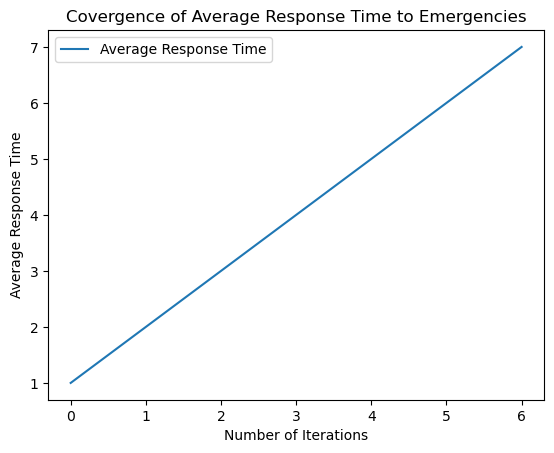

In [8]:
df1 = pd.DataFrame({'Average Response Time': resp_times}, index = [_ for _ in range(1, 51)])
plot1 = df1.plot(title = 'Covergence of Average Response Time to Emergencies')
plot1.set(xlabel='Number of Simulation Runs', ylabel='Average Response Time')
df2 = pd.DataFrame({'Percentage of Successfully Responded Emergencies': successful_perc}, index = [_ for _ in range(1, 51)])
plot2 = df2.plot(title = 'Covergence of Percentage of Successfully Responded Emergencies')
plot1.set(xlabel='Number of Simulation Runs', ylabel='Average Percentage of Successfully Responded Emergencies')

In [ ]:
print("Average Response Time: {} mins".format(round(resp_times[-1], 2)))
print("Average Percentage of Successfully Responded Emergencies: {} %".format(round(successful_perc[-1], 2)))